# Background 

In [1]:
# First import the necessary libraries
import numpy as np, pandas as pd

# Load the data
path_to_dataset = '../data/Sales_Transaction_v.4a.csv'
data = pd.read_csv(path_to_dataset)
data.head()


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [2]:
print(f'Data shape: {data.shape} \n')
data.info()

Data shape: (536350, 8) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


## Dataset Overview and Importance

The dataset used in this project consists of online sales transaction data from 2018 to 2019. It comprises 536,350 rows and 8 columns, representing customer purchases. This dataset provides a rich source of information for analysing customer purchasing behaviors, product performance, and regional sales trends. By leveraging this data, businesses can gain insights to enhance decision-making processes such as inventory management, marketing strategies, and customer relationship management.

# 2. Data Preprocessing

In [3]:
data.isnull().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

In [4]:
# Check number of unique ProductNo
print('Number of unique ProductNo:', data['ProductNo'].nunique())

# Check number of unique ProductName
print('Number of unique ProductName:', data['ProductName'].nunique())

# Lets check that each ProductNo corresponds to only one ProductName
data.groupby('ProductNo')['ProductName'].nunique().value_counts()


Number of unique ProductNo: 3768
Number of unique ProductName: 3768


ProductName
1    3768
Name: count, dtype: int64

In [5]:
# Check the data types 
data.dtypes

TransactionNo     object
Date              object
ProductNo         object
ProductName       object
Price            float64
Quantity           int64
CustomerNo       float64
Country           object
dtype: object

From the analysis above:

`TransactionNo`
- Type: strings
- Reason: Unique identifiers not meant for numerical operations.

`Dates`
- Type: format='%m/%d/%Y'
- Reason: Easier date manipulation, filtering, and calculations.

`ProductNo`
- Type: category
- Reason: Limited unique values, allows grouping and aggregation.

`ProductName`
- Type: String
- Reason: Allows for future nlp analysis. 

`Country`
- Type: category
- Reason: Finite set of categories.

In [6]:
# Formating TransactionNo column
data['TransactionNo'] = data['TransactionNo'].astype(str)

# Formating the Date column
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

# Formating ProductNo column
data['ProductNo'] = data['ProductNo'].astype('category')

# Formating ProductName column
data['ProductName'] = data['ProductName'].str.upper()
data['ProductName'] = data['ProductName'].astype('str')

# Formating Country column
data['Country'] = data['Country'].str.upper()
data['Country'] = data['Country'].astype('category')

data.head()


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,2019-12-09,22485,SET OF 2 WOODEN MARKET CRATES,21.47,12,17490.0,UNITED KINGDOM
1,581475,2019-12-09,22596,CHRISTMAS STAR WISH LIST CHALKBOARD,10.65,36,13069.0,UNITED KINGDOM
2,581475,2019-12-09,23235,STORAGE TIN VINTAGE LEAF,11.53,12,13069.0,UNITED KINGDOM
3,581475,2019-12-09,23272,TREE T-LIGHT HOLDER WILLIE WINKIE,10.65,12,13069.0,UNITED KINGDOM
4,581475,2019-12-09,23239,SET OF 4 KNICK KNACK TINS POPPIES,11.94,6,13069.0,UNITED KINGDOM


In [7]:
# Count negative values of Price column
print('Negative values of Price column:', data[data['Price'] < 0].shape[0]) 

# Count negative values of Quantity column
print('Negative values of Quantity column:', data[data['Quantity'] < 0].shape[0])

# Count TransactionNo that start with a C
print('TransactionNo that start with a C:', data[data['TransactionNo'].str.startswith('C')].shape[0])

Negative values of Price column: 0
Negative values of Quantity column: 8585
TransactionNo that start with a C: 8585


Negative numbers in the Quantity column and transaction numbers that start with 'C' often represent user returns in datasets like this. We need to collect and store all the returns in a separate dataset, as returns will not be needed for further analysis.

In [8]:
# Filter out returns based on negative Quantity and TransactionNo starting with 'C'
returns = data[(data['Quantity'] < 0) | (data['TransactionNo'].str.startswith('C'))]

# Remove returns from the original dataset
data = data[~((data['Quantity'] < 0) | (data['TransactionNo'].str.startswith('C')))]

# Save the returns to a separate dataset
returns.to_csv('.csv', index=False)

In [9]:
# Check Null values again
data.isnull().sum()


TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       1
Country          0
dtype: int64

In [10]:
# There is only 1 entry with missing CustomerNo, let's remove it
data = data.dropna(subset=['CustomerNo'])
data.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,2019-12-09,22485,SET OF 2 WOODEN MARKET CRATES,21.47,12,17490.0,UNITED KINGDOM
1,581475,2019-12-09,22596,CHRISTMAS STAR WISH LIST CHALKBOARD,10.65,36,13069.0,UNITED KINGDOM
2,581475,2019-12-09,23235,STORAGE TIN VINTAGE LEAF,11.53,12,13069.0,UNITED KINGDOM
3,581475,2019-12-09,23272,TREE T-LIGHT HOLDER WILLIE WINKIE,10.65,12,13069.0,UNITED KINGDOM
4,581475,2019-12-09,23239,SET OF 4 KNICK KNACK TINS POPPIES,11.94,6,13069.0,UNITED KINGDOM


# 3. Exploratory Data Analysis

## Detecting Outliers

### Interquartile Range (IQR)

In [11]:
# Exploration of numerical data.
print(data[['Price', 'Quantity']].describe())


               Price       Quantity
count  527764.000000  527764.000000
mean       12.629640      10.594679
std         7.933224     156.786795
min         5.130000       1.000000
25%        10.990000       1.000000
50%        11.940000       3.000000
75%        14.090000      11.000000
max       660.620000   80995.000000


In [12]:
# Lets calculate IQR (inter quartile range) for Price and Quantity
Q1 = data[['Price', 'Quantity']].quantile(0.25)
Q3 = data[['Price', 'Quantity']].quantile(0.75)
IQR = Q3 - Q1

# Lets calculate the number of potential outliers in Price and Quantity
outliers = (data[['Price', 'Quantity']] < (Q1 - 1.5 * IQR)) | (data[['Price', 'Quantity']] > (Q3 + 1.5 * IQR))
print('Potential outliers in Price and Quantity:\n', outliers.sum())

Potential outliers in Price and Quantity:
 Price       97109
Quantity    27125
dtype: int64


This is a large number of outliers we can not just use IQR to define outliers because if we will we will loose a big chunk of data. We would need to do further data analysis to detect outliers. 


- Extremly high std in Quantity and reletivly high std in Price suggest that there are outliers and that the data needs cleaning. Furthermore the mean price for an item is 12.66$ where the max amount is 660. We would need to eliminate those anomalises.  



### Graphical Verification

#### Box and Violin Plots

This is not your audience. Your audience is stock holders business owners and people with some knowledge of the analysis but not all. 

Logarithmic values were used instead of raw data because the distribution of the original data is too large. This large distribution makes the normal box or violin plot less meaningful. By applying a logarithmic transformation, the scale of the data is compressed, allowing for better visualisation and interpretation of the distribution and outliers. You can check the original data box plot in the archive folder.


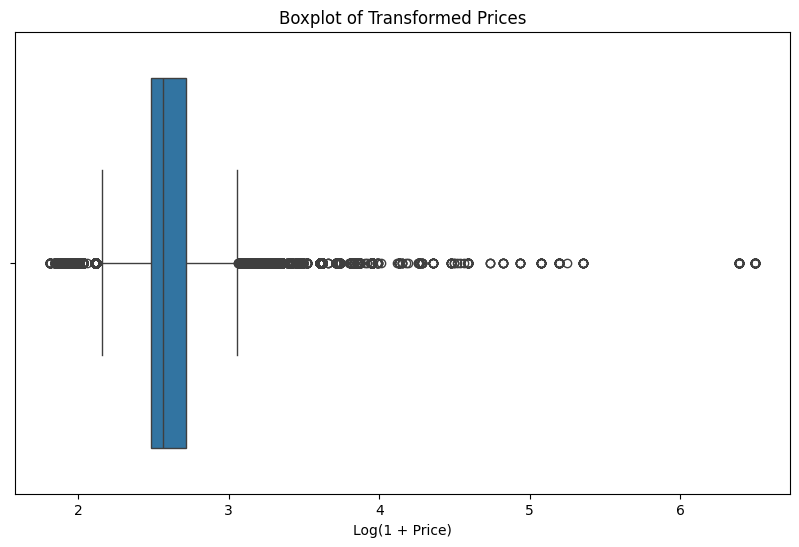

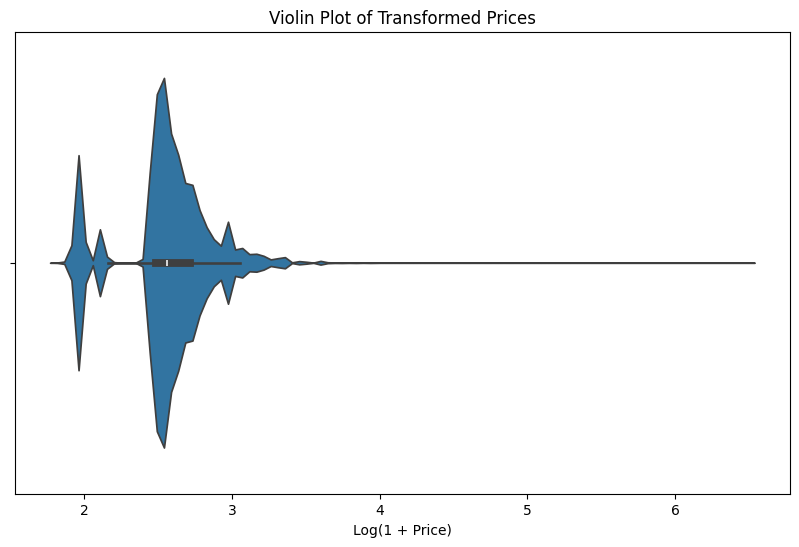

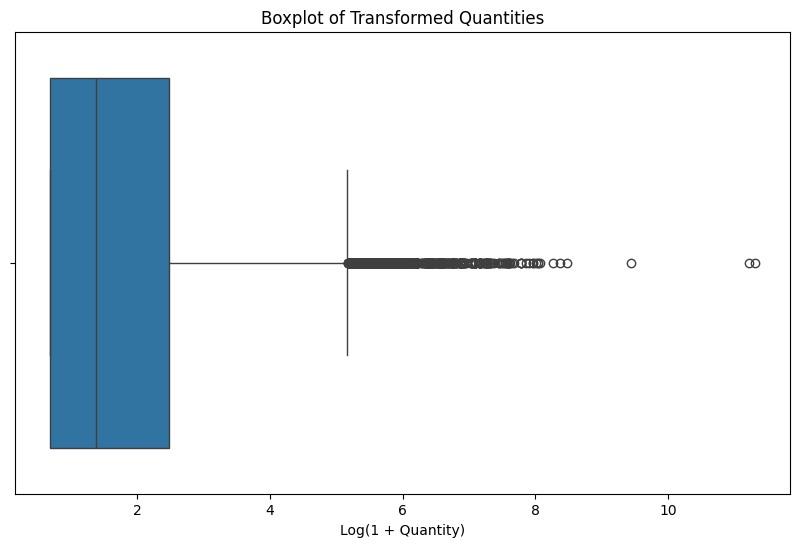

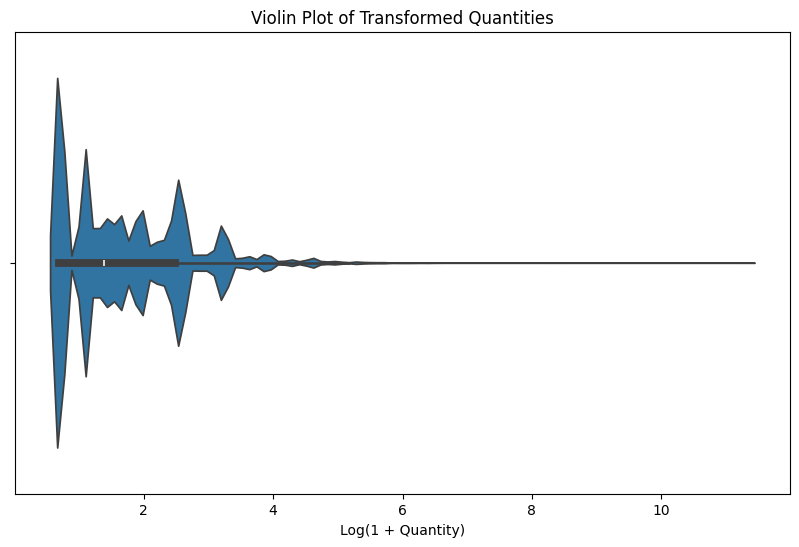

In [13]:
# Import necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Logarithmic transformation of Price and Quantity
transformed_prices = np.log1p(data['Price'])  # log(1 + prices)
transformed_quantities = np.log1p(data['Quantity'])  # log(1 + quantities)

# Boxplot of Price
plt.figure(figsize=(10, 6))
sns.boxplot(x=transformed_prices)
plt.title('Boxplot of Transformed Prices')
plt.xlabel('Log(1 + Price)')
plt.show()

# Violin plot of Price
plt.figure(figsize=(10, 6))
sns.violinplot(x=transformed_prices)
plt.title('Violin Plot of Transformed Prices')
plt.xlabel('Log(1 + Price)')
plt.show()

# Boxplot of Quantity
plt.figure(figsize=(10, 6))
sns.boxplot(x=transformed_quantities)
plt.title('Boxplot of Transformed Quantities')
plt.xlabel('Log(1 + Quantity)')
plt.show()

# Violin plot of Quantity
plt.figure(figsize=(10, 6))
sns.violinplot(x=transformed_quantities)
plt.title('Violin Plot of Transformed Quantities')
plt.xlabel('Log(1 + Quantity)')
plt.show()


### Z-Score: Uncovering Hidden Anomalies
Imagine you have a large dataset of transactions, and you want to ensure the data is clean and reliable. One powerful tool at your disposal is the Z-score.

A Z-score tells us how far a data point is from the average, measured in standard deviations. Think of it as a way to see how unusual a particular value is compared to the rest of the data. For example, if most transactions are around $100, but one is $1000, the Z-score will highlight this anomaly.

In our dataset, using Z-scores helps us spot these outliers. By identifying transactions with extremely high or low quantities or prices, we can catch potential errors or unusual patterns that might need further investigation. This ensures our analysis is based on accurate and meaningful data, leading to better business decisions.

In [14]:
# Lets try z-score method to remove outliers
from scipy.stats import zscore

# Calculate z-scores
z_scores = zscore(data[['Price', 'Quantity']])
abs_z_scores = np.abs(z_scores)
outliers =  (z_scores > 3).sum()
print('Outliers based on Z-scores: \n', outliers)



Outliers based on Z-scores: 
 Price       800
Quantity    442
dtype: int64


The number of outliers is insignificant and therefore we can remove them for data clarity.

In [15]:
# Using the z score remove the outliers
data = data[(abs_z_scores < 3).all(axis=1)]

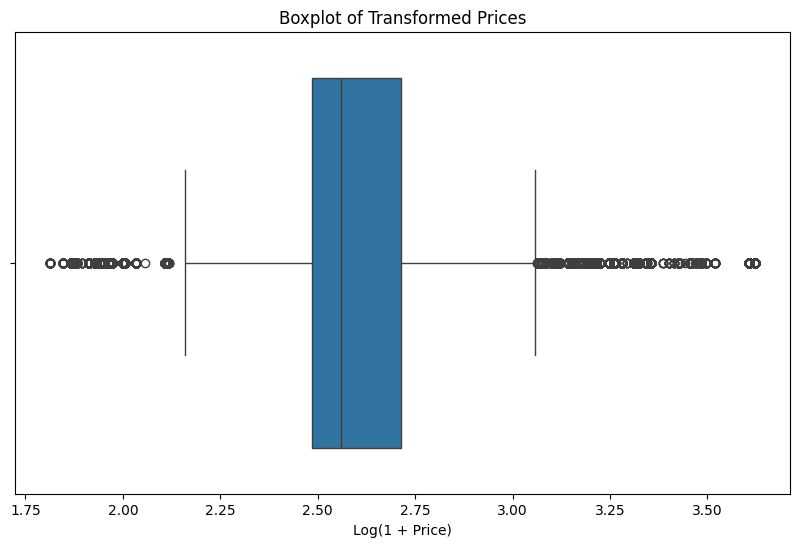

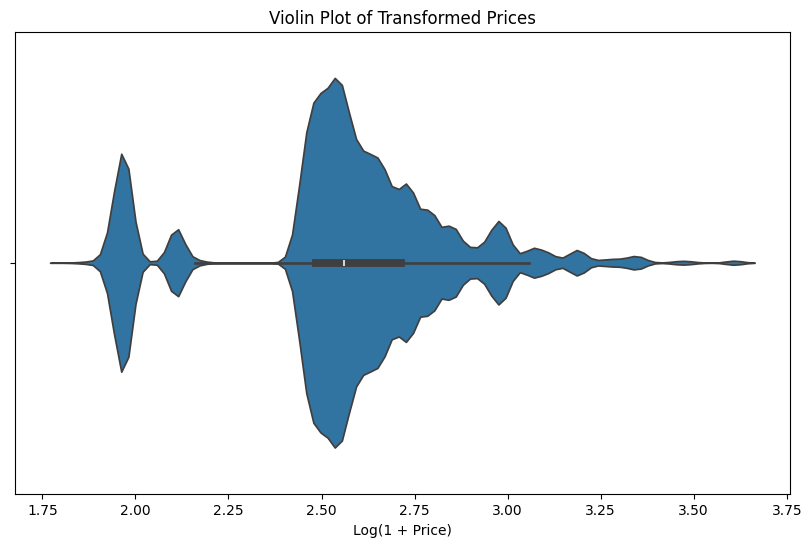

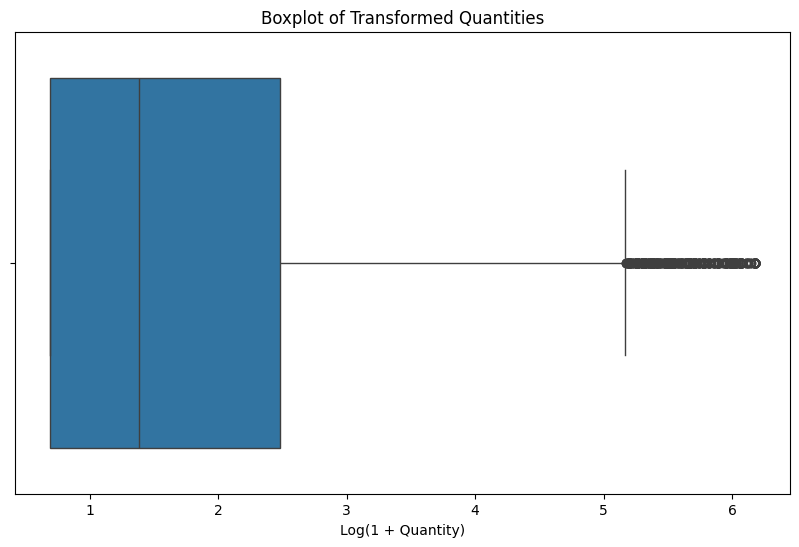

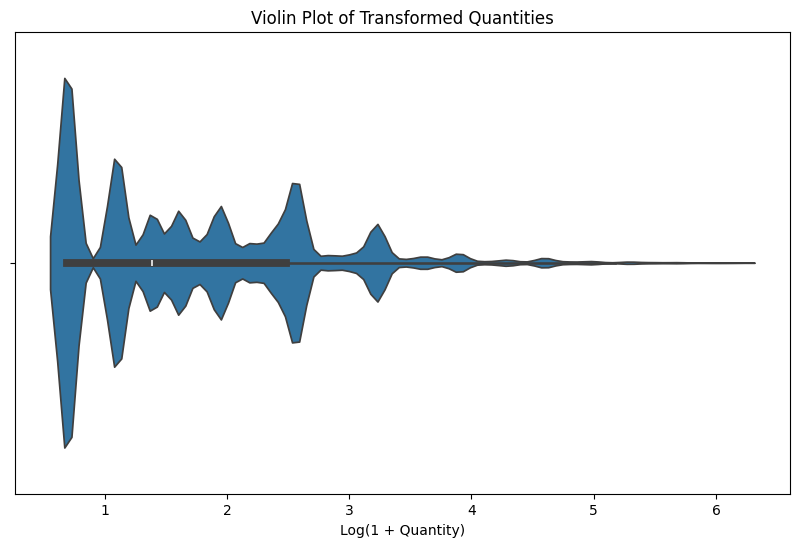

In [16]:
# Logarithmic transformation of Price and Quantity
transformed_prices = np.log1p(data['Price'])  # log(1 + prices)
transformed_quantities = np.log1p(data['Quantity'])  # log(1 + quantities)

# Boxplot of Price
plt.figure(figsize=(10, 6))
sns.boxplot(x=transformed_prices)
plt.title('Boxplot of Transformed Prices')
plt.xlabel('Log(1 + Price)')
plt.show()

# Violin plot of Price
plt.figure(figsize=(10, 6))
sns.violinplot(x=transformed_prices)
plt.title('Violin Plot of Transformed Prices')
plt.xlabel('Log(1 + Price)')
plt.show()

# Boxplot of Quantity
plt.figure(figsize=(10, 6))
sns.boxplot(x=transformed_quantities)
plt.title('Boxplot of Transformed Quantities')
plt.xlabel('Log(1 + Quantity)')
plt.show()

# Violin plot of Quantity
plt.figure(figsize=(10, 6))
sns.violinplot(x=transformed_quantities)
plt.title('Violin Plot of Transformed Quantities')
plt.xlabel('Log(1 + Quantity)')
plt.show()


*Improved Data Visualization After Removing Anomalies*

After applying the Z-score method to identify and remove anomalies, we observed a significant improvement in our data visualization. The new box plot and violin plot are much more balanced compared to the initial plots with anomalies. This indicates that we are moving in the right direction by cleaning our data.

However, the data still appears to be quite scattered. To further refine our dataset and enhance its quality, we will employ machine learning techniques, specifically the Isolation Forest algorithm. This method will help us detect and isolate outliers more effectively, ensuring our data is as accurate and reliable as possible for subsequent analysis.